In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# downloaded from:
# http://www.nature.com/nature/journal/v542/n7642/fig_tab/nature21360_F1.html
file = 'nature21360-f1.csv'

In [13]:
df = pd.read_csv(file, names=['time', 'flux', 'error'], skiprows=1)
# time = BJD(TDB)-2450000

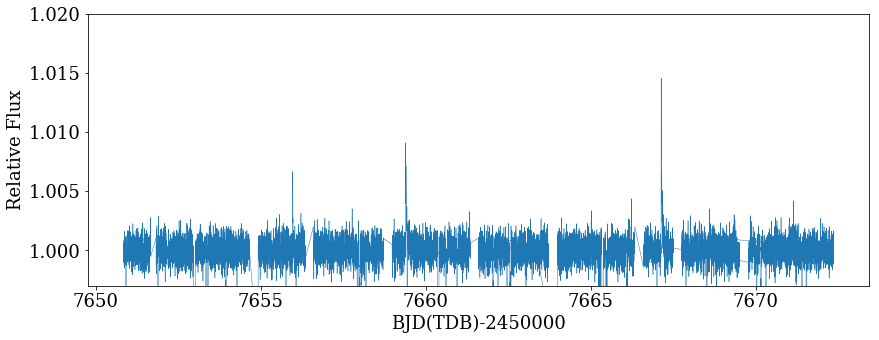

In [29]:
plt.figure(figsize=(14,5))
plt.plot(df['time'], df['flux'], lw=0.5);
plt.ylim(.997,1.02);
plt.xlabel('BJD(TDB)-2450000');
plt.ylabel('Relative Flux');

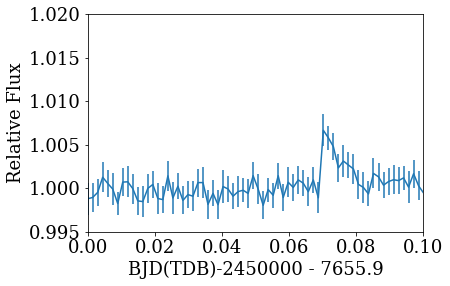

In [48]:
plt.errorbar(df['time'] - 7655.9, df['flux'], df['error']);
plt.xlim(0,0.1);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7655.9');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

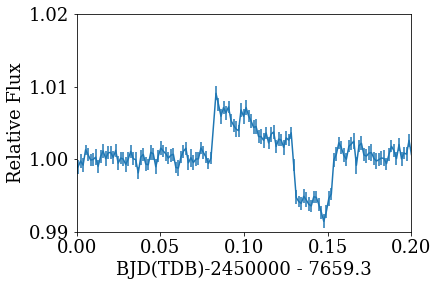

In [49]:
plt.errorbar(df['time'] - 7659.3, df['flux'], df['error']);
plt.xlim(0,0.2);
plt.ylim(.99,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7659.3');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

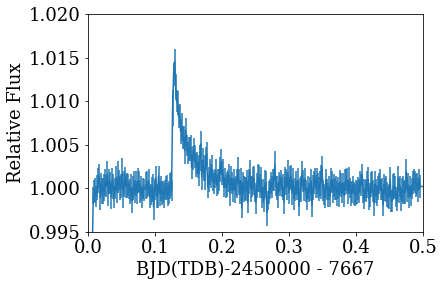

In [50]:
plt.errorbar(df['time']-7667, df['flux'], df['error']);
plt.xlim(0,.5);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7667');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare3.png', dpi=150, bbox_inches='tight', pad_inches=0.25)